In [1]:
from math import sin, cos, factorial, log, exp, lgamma
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Fonction à étudier 
def fun(x):
    return sin(x)

# Dérivées n-èmes en x f^(n)(x)
def derfun(x,n):
    if n % 2 == 0:    # sin ou cos selon que n pair ou impair
        res = sin(x)
    else:
        res = cos(x)
    if n % 4 >= 2:    # suite des signes : + + - - qui se répète, donc - pour multiples de 4 plus 2 ou 3
        res = -res
    return res

# Borne sur la valeur absolue de la n-ème dérivée f^(n)(x) prise sur l'intervalle allant de a à x
def borneder(x,a,n):
    return 1          # ne nous compliquons pas la vie : borne simple valable pour tout a et x

In [3]:
# Bornes de l'intervalle [b c] à étudier 
b = -5
c =  5
npoints = 200         # nombre de points en abscisse pour les plots
ylims = (-2,2)        # limites pour l'axe des ordonnées sur le plot

# Caractéristiques du développement de Taylor à étudier
a   = 0               # Point de référence
deg = 5               # Degré du développement

In [4]:
# Developpement de Taylor de degré deg autour de a evalué au point x
def taylor(x,a,deg):
    res = fun(a)
    for n in range(1,deg+1):
        res += derfun(a,n) * (x-a)**n / factorial(n)
    return res

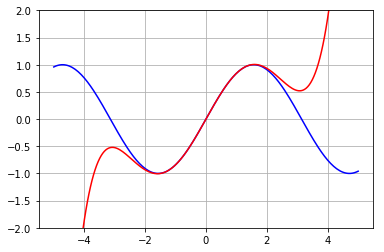

In [5]:
# Calcul des valeurs de la fonction exacte
xvalues = np.linspace(b,c,npoints)
yvalues = np.array([fun(x) for x in xvalues])

# Calcul des valeurs du développement de Taylor
taylorvalues = np.array([taylor(x,a,deg) for x in xvalues])

# Plot de la fonction exacte (bleu) et de son approximation par Taylor (rouge)
plt.plot(xvalues,yvalues,'b',xvalues,taylorvalues,'r')
plt.ylim(ylims);
plt.grid(1)

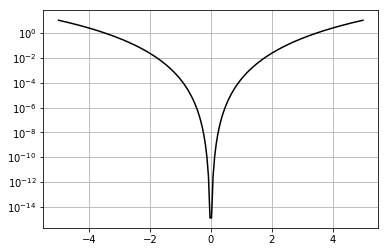

In [6]:
# Plot (semi-logarithmique) de l'erreur de l'approximation (calculée a posteriori à l'aidde la vraie valeur)
errorvalues = np.abs(taylorvalues-yvalues)
plt.semilogy(xvalues,errorvalues,'k');
plt.grid(1)

In [7]:
# Borne sur le reste de Taylor pour un développement de degré deg autour de a
# (formule correcte borne(f^(n+1)) * |x-a|^(deg+1) / (deg+1)!)
def restetaylor(x,a,deg):
    return borneder(x,a,deg+1) * abs(x-a)**(deg+1) / factorial(deg+1) 

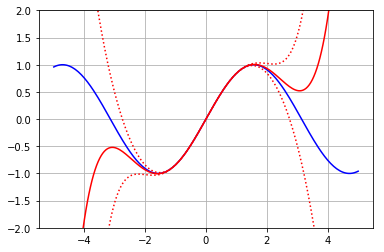

In [8]:
# Calcul d'une borne sur le reste de Taylor et des bornes sup/inf garanties qui en découlent 
restetaylorvalues = np.array([restetaylor(x,a,deg) for x in xvalues])
taylorbornesup = taylorvalues + restetaylorvalues
taylorborneinf = taylorvalues - restetaylorvalues

# Plot de la fonction exacte (bleu) et de son approximation par Taylor (rouge) 
# avec bornes sup/inf garanties (pointillés)
plt.plot(xvalues,yvalues,'b',xvalues,taylorvalues,'r',xvalues,taylorborneinf,'r:',xvalues,taylorbornesup,'r:')
plt.ylim(ylims)
plt.grid(1)

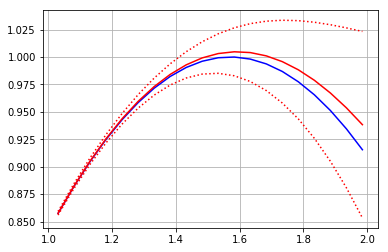

In [9]:
# Zoom sur ce plot (via positions relatives)
posrel = (.6,.7)
pos = slice(round(npoints*posrel[0]), round(npoints*posrel[1]))
plt.plot(xvalues[pos],yvalues[pos],'b',xvalues[pos],taylorvalues[pos],'r',
        xvalues[pos],taylorborneinf[pos],'r:',xvalues[pos],taylorbornesup[pos],'r:')
plt.grid(1)

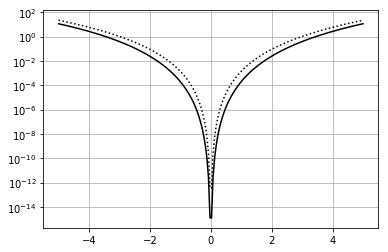

In [10]:
# Plot (semi-logarithmique) de l'erreur réelle de l'approximation (noir) 
# et de la borne supérieure fournie par le reste de Taylor (pointillés)
plt.semilogy(xvalues,errorvalues,'k',xvalues,restetaylorvalues,'k:')
plt.grid(1)

In [11]:
# Essayons d'obtenir une meilleure approximation sur un intervalle plus grand
b   = -20
c   =  20
deg =  30

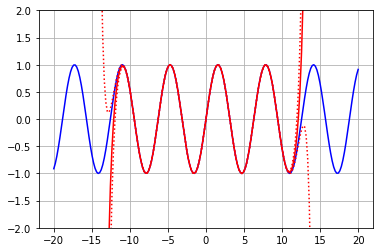

In [12]:
# Meme calculs que ci-dessus : plot de la fonction (en bleu), son développement (en rouge) et les bornes (pointillés)
xvalues = np.linspace(b,c,npoints)
yvalues = np.array([fun(x) for x in xvalues])
taylorvalues = np.array([taylor(x,a,deg) for x in xvalues])
restetaylorvalues = np.array([restetaylor(x,a,deg) for x in xvalues])
taylorbornesup = taylorvalues + restetaylorvalues
taylorborneinf = taylorvalues - restetaylorvalues
plt.plot(xvalues,yvalues,'b',xvalues,taylorvalues,'r',xvalues,taylorborneinf,'r:',xvalues,taylorbornesup,'r:')
plt.ylim(ylims)
plt.grid(1)

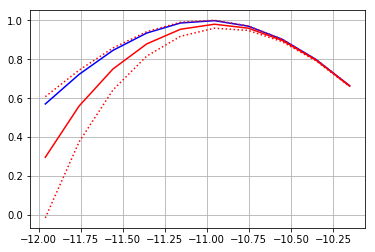

In [13]:
# Zoom sur ce plot (via positions relatives)
posrel = (.2,.25)
pos = slice(round(npoints*posrel[0]), round(npoints*posrel[1]))
plt.plot(xvalues[pos],yvalues[pos],'b',xvalues[pos],taylorvalues[pos],'r',
        xvalues[pos],taylorborneinf[pos],'r:',xvalues[pos],taylorbornesup[pos],'r:')
plt.grid(1)

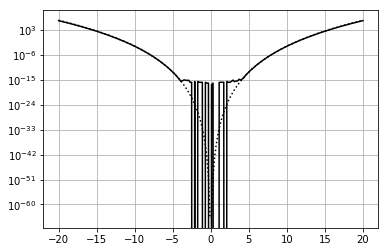

In [14]:
# Calcul de l'erreur de l'approximation et de sa borne théorique
errorvalues = np.abs(taylorvalues-yvalues)
plt.semilogy(xvalues,errorvalues,'k',xvalues,restetaylorvalues,'k:')
plt.grid(1)

In [15]:
# Que se passe-t-il autour de zéro ? 
# On s'approche en fait de la précision maximale des calculs en virgule flottante (autour de 1e-16), 
# et même si théoriquement le développement devrait avoir une précision meilleure les inévitables 
# erreurs d'arrondi dans les calculs dégradent la précision du résultat.

### Pour aller encore plus loin 

In [16]:
# Soyons encore plus ambitieux pour notre approximation 
b   = -20
c   =  20
deg = 200

In [17]:
# Meme calculs que ci-dessus
xvalues = np.linspace(b,c,npoints)
yvalues = np.array([fun(x) for x in xvalues])
taylorvalues = np.array([taylor(x,a,deg) for x in xvalues])

OverflowError: int too large to convert to float

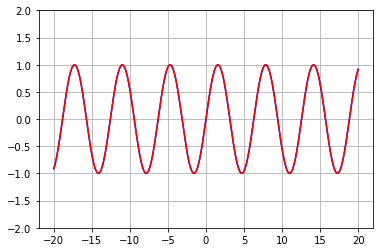

In [18]:
# Un nouveau problème se pose : certains termes de degré élevé nécessitent de calculer un x (grand) 
# élevé à une grande puissance, ce qui cause un overflow (dépassement de la limite supérieure pour
# les nombres en virgule flottante, qui est aux alentours de 1e308). 
# Pourtant la division par la factorielle va ensuite rediminuer ce nombre, et le quotient qui 
# devrait en résulter est un nombre tout à fait représentable.

# Il est possible de remédier à cela avec un calcul amélioré des termes, en passant par le logarithme 
# (et la fonction log-gamma qui permet de calculer le log de la factorielle selon log(n!) = lgamma(n+1)

# Calcul d'un terme t^n / n! sans overflow
def puissfact(t,n):
    logres = n*log(abs(t)) - lgamma(n+1)
    if t<0 and (n%2 == 1):   # négatif seulement si t<0 et n impair
        return -exp(logres)
    else:
        return exp(logres)

# Code Taylor tentant d'éviter les overflow:
def taylor2(x,a,deg):
    res = fun(a)
    for n in range(1,deg+1):
        res += derfun(a,n) * puissfact(x-a,n)
    return res
taylorvalues = np.array([taylor2(x,a,deg) for x in xvalues])
plt.plot(xvalues,yvalues,'b',xvalues,taylorvalues,'r')
plt.ylim(ylims)
plt.grid(1)

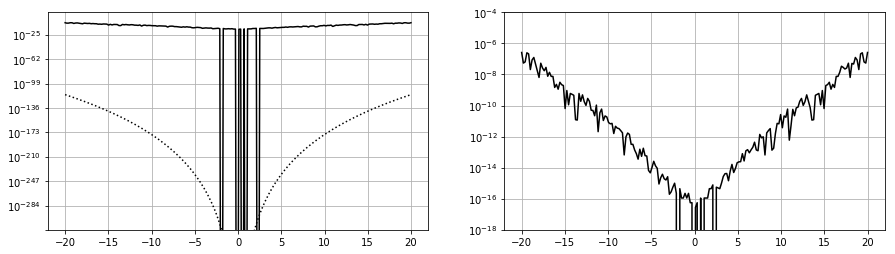

In [26]:
# Regardons l'erreur commise 
def restetaylor2(x,a,deg):
    return borneder(x,a,deg+1) * puissfact(abs(x-a),deg+1)
errorvalues = np.abs(taylorvalues-yvalues)
restetaylorvalues = np.array([restetaylor2(x,a,deg) for x in xvalues])
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
plt.semilogy(xvalues,errorvalues,'k',xvalues,restetaylorvalues,'k:')
plt.grid(1)
plt.subplot(1,2,2)
plt.semilogy(xvalues,errorvalues,'k',xvalues,restetaylorvalues,'k:')
plt.ylim(1e-18,1e-4)
plt.grid(1)

In [ ]:
# A nouveau la précision théorique (<1e-100) est totalement irréaliste à cause des erreurs d'arrondi
# Mais un nouveau phénomène est constaté : la précision se dégrade lorsque x s'éloigne de 
# zéro, et devient encore moins bonne que la précision machine (1e-8  au lieu de 1e-16)
# Une hypothèse pour expliquer cela serait l'accumulation d'erreurs dans la somme d'un
# grand nombre de termes. 